## Unit 2 - Time-Independent Schrödinger Equation

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 2.10

Consider TISE for harmonic oscillator potential.

(a) Construct $\psi_2(x)$.

(b) Sketch $\psi_0(x)$, $\psi_1(x)$, and $\psi_2(x)$.

(c) Check the orthogonality of $\psi_0(x)$, $\psi_1(x)$, and $\psi_2(x)$, by explicit integration. 

Hint: If you exploit the even-ness and odd-ness of the functions, there is really only one integral
left to do.

### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
m, h, w, A, a = sym.symbols("m, hbar, w, A, a", positive = True, real = True)
x = sym.symbols("x", real = True)

In [3]:
sym.init_printing(use_unicode=True)

#### Solution to (a)

Stationary solutions:
$$
\psi_n(x) = \frac{1}{\sqrt{n!}} (\hat a_+)^n \psi_0(x) \qquad \psi_0(x) = \bigg( \frac{m\omega}{\pi \hbar}\bigg)^{1/4} \exp\bigg( -\frac{m\omega}{2\hbar } x^2 \bigg)
$$
Ladder operators:
$$
\hat a_\pm 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp i \hat p + m \omega x) 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp \hbar \partial_x + m \omega x) 
$$
Short-hand notation:
$$
A = \bigg( \frac{m\omega}{\pi \hbar}\bigg)^{1/4} \qquad a = \frac{1}{\sqrt{2\hbar m \omega}}
$$

In [4]:
# the ground state

𝜓0 = A * sym.exp( -(m*w)/(2*h)*(x**2) ) 

In [5]:
# ladder-up operator

def a_plus(𝜓):
    return sym.simplify( a*(-h*sym.diff(𝜓,x,1) + m*w*x*𝜓) )

In [6]:
# the first excited state

𝜓1 = a_plus(𝜓0)
𝜓1

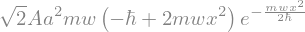

In [7]:
# the second excited state

𝜓2 = 1/sym.sqrt(2) * a_plus(𝜓1)
𝜓2

#### Solution to (b)

In [8]:
# pick some numeric values for all parameters 

nm, nh, nw = 1, 1, 1
nA = ((nm*nw)/(sym.pi*nh))**(1/4)
na = (2*nh*nm*nw)**(-1/2)

n𝜓0 = 𝜓0.subs({m:nm, h:nh, w:nw, A:nA, a:na})  # substitute values
n𝜓1 = 𝜓1.subs({m:nm, h:nh, w:nw, A:nA, a:na}) 
n𝜓2 = 𝜓2.subs({m:nm, h:nh, w:nw, A:nA, a:na}) 

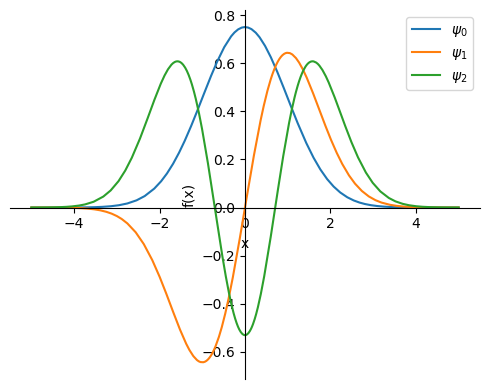

In [9]:
# plot 

p1 = sym.plotting.plot( n𝜓0, (x,-5,5), show=False, label="$\psi_0$", legend = True, size=(5,4))
p2 = sym.plotting.plot( n𝜓1, (x,-5,5), show=False, label="$\psi_1$", legend = True)
p3 = sym.plotting.plot( n𝜓2, (x,-5,5), show=False, label="$\psi_2$", legend = True)
p1.extend(p2)
p1.extend(p3)
p1.show()

#### Solution to (c)

We need to verify that
$$
\int_{-\infty}^{+\infty} \psi_m(x)\,\psi_n(x)\,dx = \delta_{mn}
$$
for $n,m=0,1,2$.

In [10]:
import numpy as np
results = np.zeros((3,3))

In [11]:
results[0,0] = sym.integrate(n𝜓0*n𝜓0, (x, -sym.oo, sym.oo))
results[0,1] = sym.integrate(n𝜓0*n𝜓1, (x, -sym.oo, sym.oo))
results[0,2] = sym.integrate(n𝜓0*n𝜓2, (x, -sym.oo, sym.oo))

results[1,0] = sym.integrate(n𝜓1*n𝜓0, (x, -sym.oo, sym.oo))
results[1,1] = sym.integrate(n𝜓1*n𝜓1, (x, -sym.oo, sym.oo))
results[1,2] = sym.integrate(n𝜓1*n𝜓2, (x, -sym.oo, sym.oo))

results[2,0] = sym.integrate(n𝜓2*n𝜓0, (x, -sym.oo, sym.oo))
results[2,1] = sym.integrate(n𝜓2*n𝜓1, (x, -sym.oo, sym.oo))
results[2,2] = sym.integrate(n𝜓2*n𝜓2, (x, -sym.oo, sym.oo))

In [12]:
results

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

---